<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/Decision_Tree_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

Let's start by using a very simple dataset for classification. The feeatures are categorical but are present as strings, so we will need to encode them as numbers.

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import graphviz

In [19]:
# Example dataset
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red', 'Blue'],
    'Shape': ['Circle', 'Square', 'Circle', 'Square', 'Circle', 'Square', 'Circle', 'Circle'],
    'Label': ['Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
})

X = data[['Color', 'Shape']]
y = data['Label']

In [20]:
# Pipeline: OneHotEncode categorical vars + Decision Tree
clf = Pipeline([
    ('encoder', OneHotEncoder()),
    ('tree', DecisionTreeClassifier(max_depth=5, random_state=42))
])

clf.fit(X, y)

# Get feature names after one-hot encoding
feature_names = clf.named_steps['encoder'].get_feature_names_out(X.columns)


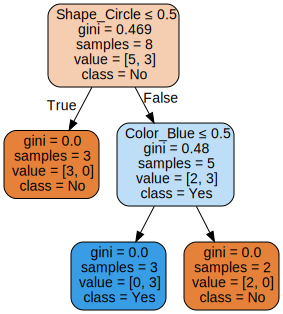

In [21]:
# Export tree to Graphviz format
dot_data = export_graphviz(
    clf.named_steps['tree'],
    out_file=None,
    feature_names=feature_names,
    class_names=clf.named_steps['tree'].classes_,
    filled=True, rounded=True,
    special_characters=True
)

# Render with graphviz
graph = graphviz.Source(dot_data)
graph

Another dataset where the features are categorical and present as numbers.

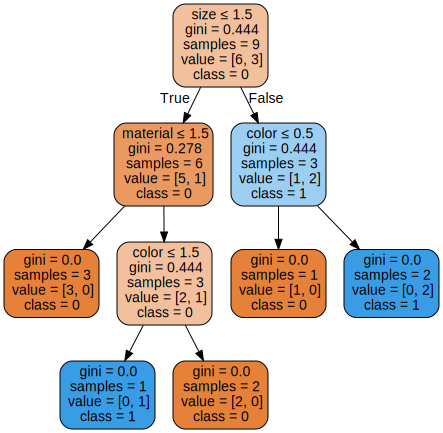

In [22]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Example dataset
data = pd.DataFrame({
    'color':    [0, 0, 1, 1, 2, 2, 0, 1, 2],
    'size':     [0, 1, 0, 2, 1, 0, 2, 2, 1],
    'material': [0, 1, 2, 0, 1, 2, 1, 0, 2],
    'target':   [0, 0, 1, 1, 0, 0, 0, 1, 0]  # color=0 → mostly 0, color=1 → mostly 1
})

X = data.drop('target', axis=1)
y = data['target']

# Decision Tree (directly on encoded numbers)
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X, y)

# Feature names are just the dataframe columns
feature_names = list(X.columns)

# Export tree to Graphviz format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=[str(c) for c in clf.classes_],  # convert to strings
    filled=True, rounded=True,
    special_characters=True
)

# Render with graphviz
graph = graphviz.Source(dot_data)
graph


Let's look at an example of regression using Decision Trees.

Test set predictions: [39. 23. 33. 49. 39. 13. 23. 33. 49. 43. 49. 23. 28. 43.]
Mean Squared Error: 30.571428571428573


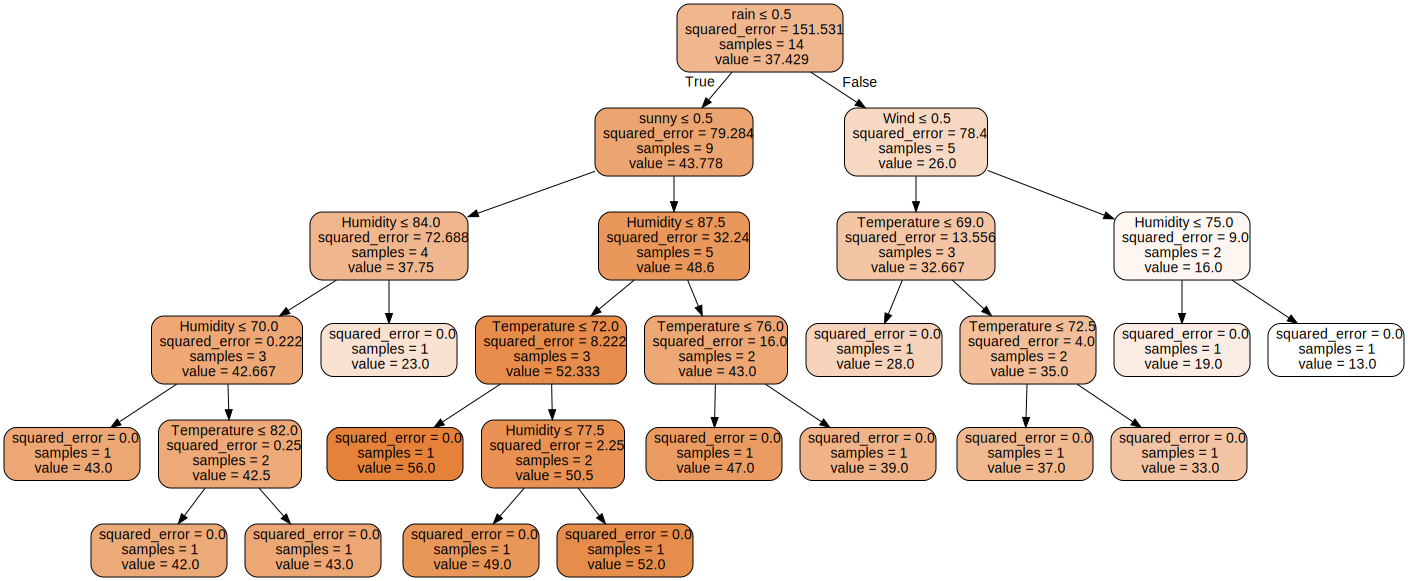

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29, 25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
}

df = pd.DataFrame(dataset_dict)

# One-hot encode 'Outlook' column
df = pd.get_dummies(df, columns=['Outlook'],prefix='',prefix_sep='')

# Convert 'Wind' column to binary
df['Wind'] = df['Wind'].astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rain', 'Temperature', 'Humidity', 'Wind', 'Num_Players']
df = df[column_order]

# Split features and target
X, y = df.drop('Num_Players', axis=1), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print results
print("Test set predictions:", y_pred)
print("Mean Squared Error:", mse)


# Export the tree to Graphviz DOT format (copy and paste into a Graphviz renderer to visualize)
dot_data = export_graphviz(regressor, out_file=None,
                          feature_names=X.columns,
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph

We will use the Pima Indians Diabetes dataset. More details are available at: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

We have provided an easy to download file and we will use that in the code below.

In [24]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)

In [25]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

In [29]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.74      0.78      0.76       146
           1       0.58      0.53      0.56        85

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.68      0.69      0.68       231

Predicted labels:  [0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]
Accuracy:  0.6883116883116883


In [30]:
!pip install scikit-plot

In [31]:
!pip install graphviz

In [32]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [33]:
classes = y.unique()
classes

array([1, 0])

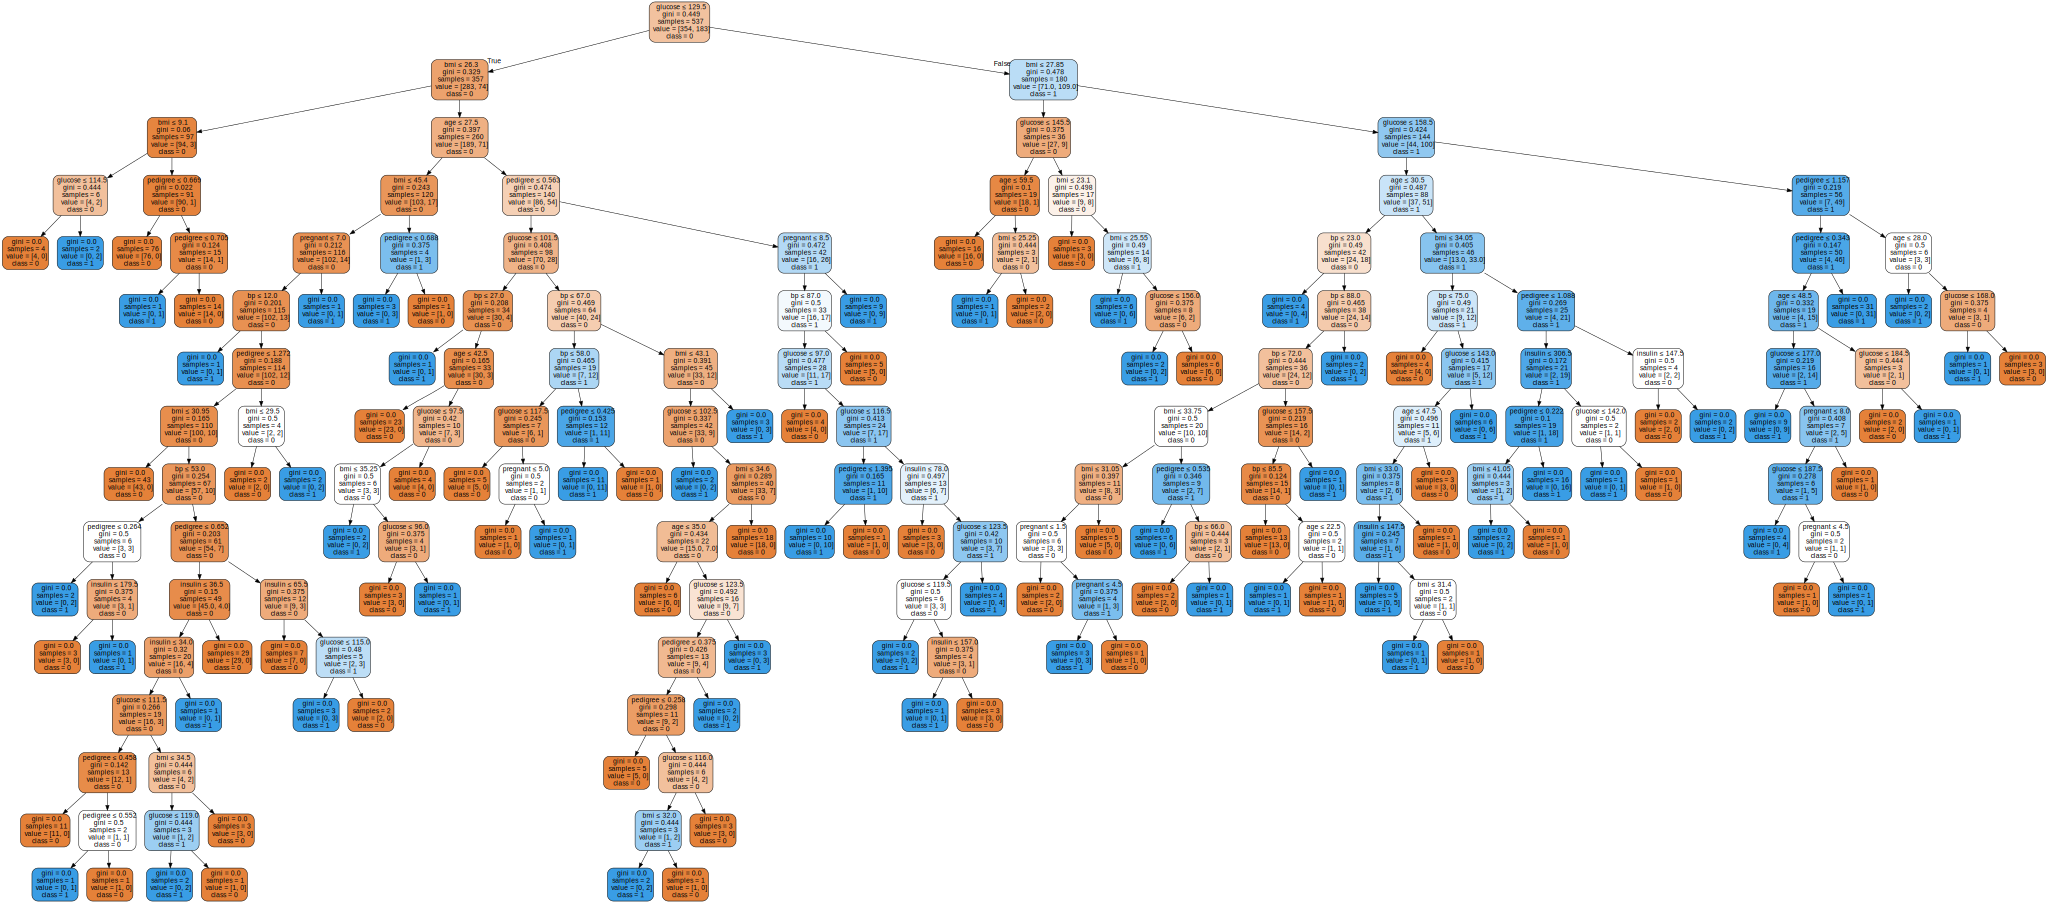

In [34]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

In [36]:
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = rf.predict(X_test)
print("-------------------Random Forest Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

-------------------Random Forest Model Report------------------------
accuracy = 0.7792207792207793
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       146
           1       0.74      0.61      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [37]:
ad = AdaBoostClassifier()
ad = ad.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = ad.predict(X_test)
print("-------------------Adaboost Model Report------------------------")

print("accuracy = " + str(accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

-------------------Adaboost Model Report------------------------
accuracy = 0.7575757575757576
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.70      0.59      0.64        85

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



# Another Example - Car Origin Dataset

In [38]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [39]:
X = cars[['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'size']]

In [40]:
y = cars['origin']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [42]:
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(X_train, y_train)

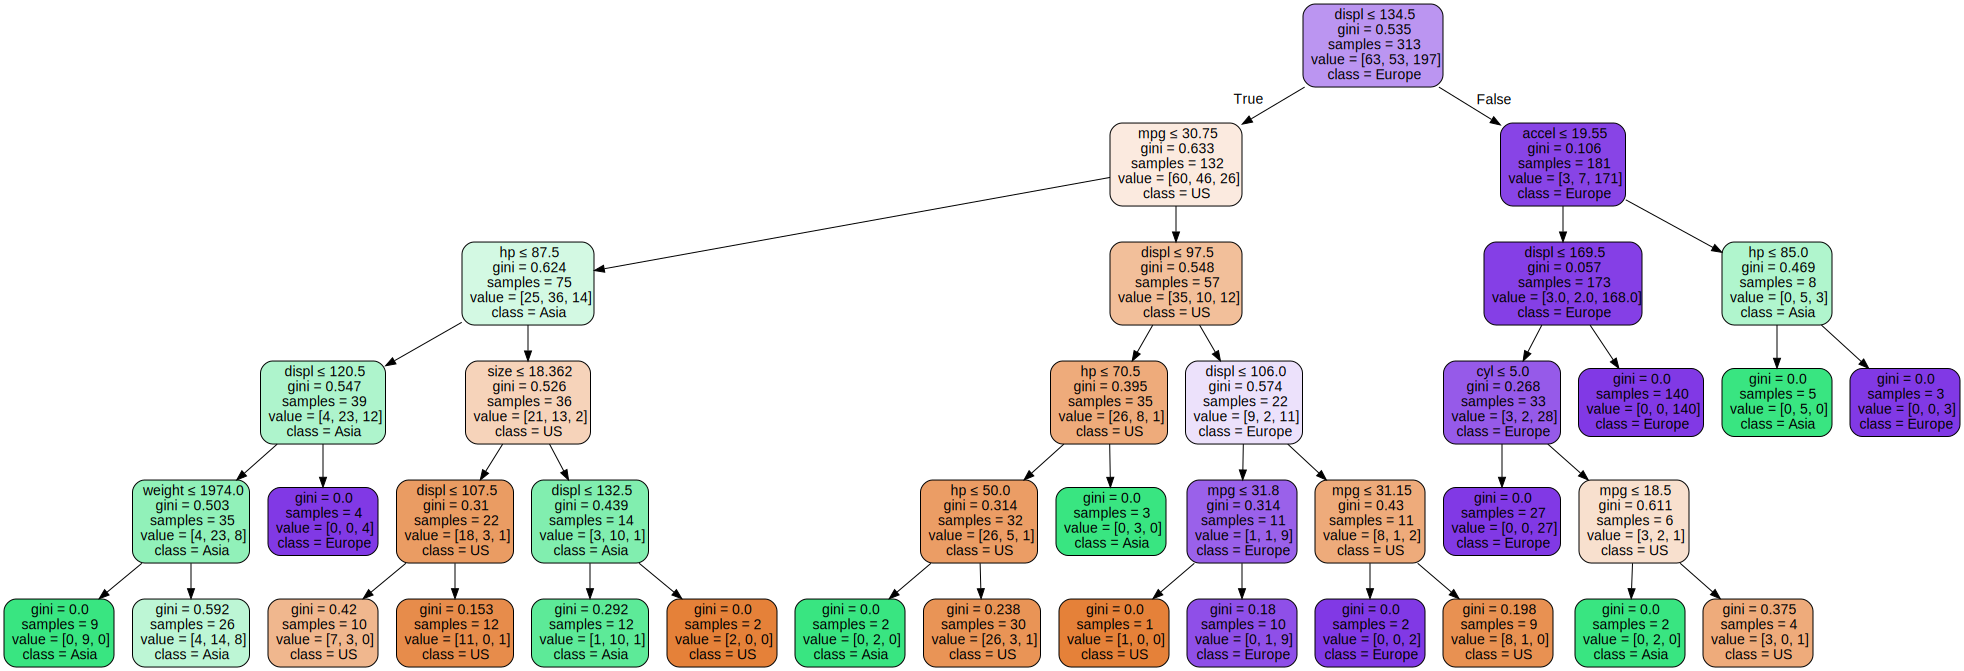

In [43]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=y.unique(),
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [44]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Asia       0.70      0.88      0.78        16
      Europe       0.50      0.53      0.52        15
          US       0.91      0.81      0.86        48

    accuracy                           0.77        79
   macro avg       0.70      0.74      0.72        79
weighted avg       0.79      0.77      0.78        79



# Parameter Grid Builder for Parameter Tuning

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]

gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(X, y)
print(gs_dt.best_params_)
# find best model score
print(gs_dt.score(X_test, y_test))


{'dt__max_depth': 7, 'dt__min_samples_leaf': 2}
0.9620253164556962


In [46]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier()

params = {'max_depth': [5, 7, 9],
          'n_estimators': [50, 100, 200],
          'max_features': ['sqrt', 'log2']
          }

grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, y)

print(grid.best_params_)
# find best model score
print(grid.score(X_test, y_test))

{'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 50}
1.0


# Regression Trees

In [47]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [48]:
cars.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

X = cars[['cyl', 'displ', 'hp', 'weight', 'accel', 'origin', 'size']]
y = cars['mpg']
le = preprocessing.LabelEncoder()
X.loc[:,'origin'] = le.fit_transform(X['origin'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
# finish
predictions = regressor.predict(X_test)

print("R2 square = ", r2_score(y_test, predictions))
print("MSE = ", mean_squared_error(y_test, predictions))
print("MAE = ", mean_absolute_error(y_test, predictions))
print("Explained variance score = ", explained_variance_score(y_test, predictions))

R2 square =  0.5186917184664724
MSE =  32.12443037974684
MAE =  3.981012658227849
Explained variance score =  0.5195859466101937


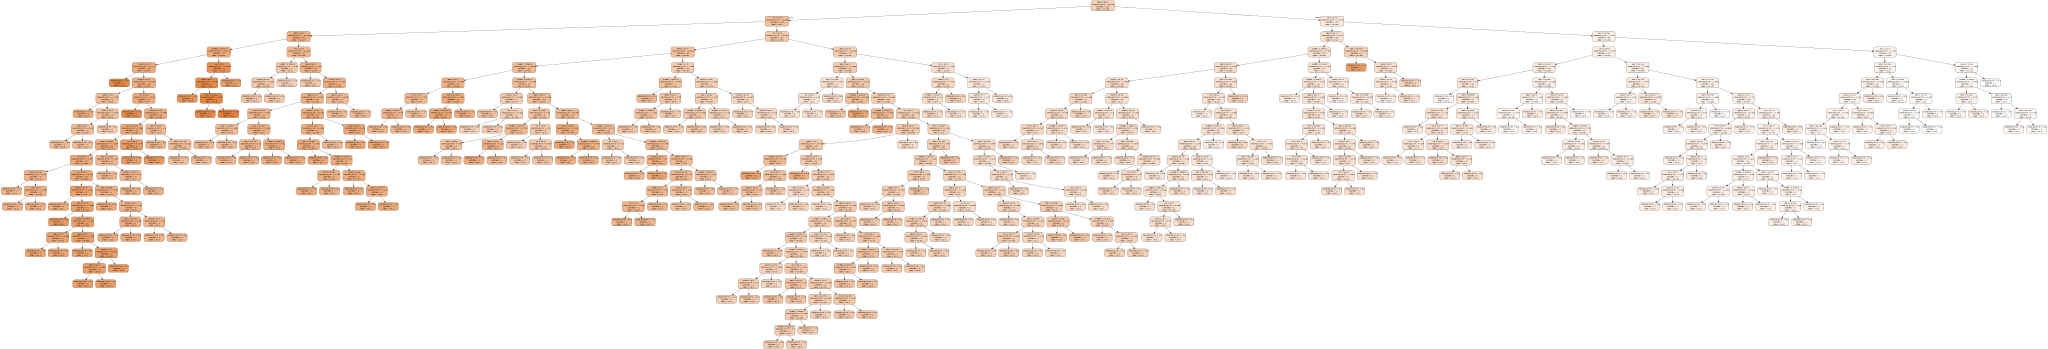

In [51]:
import graphviz
dot_data = tree.export_graphviz(regressor, out_file=None,
                     feature_names=X.columns,
                     class_names=y.unique(),
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph